# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import random
import shutil
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score
import warnings
from keras.utils.np_utils import to_categorical
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/MDM/Files/hmnist_28_28_RGB.csv")
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
X, y = df.iloc[:,:-1], df.iloc[:,-1:]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree

## Setup

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

In [ ]:
DT = DecisionTreeClassifier()

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the decision tree classifier object
dt_clf = DecisionTreeClassifier(max_features='sqrt')

# Define the parameter grid for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform the grid search with 5-fold cross validation
dt_grid_search = GridSearchCV(dt_clf, param_grid, cv=5, verbose=2)

# Fit the grid search to the training data
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.2s
[

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [ ]:
BP = dt_grid_search.best_params_
print(f"Best parameters: {BP}")
print("\n The best score across ALL searched params:\n",dt_grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}

 The best score across ALL searched params:
 0.6647071134987131


In [ ]:
clf = DecisionTreeClassifier(**BP)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10,
                       splitter='random')

## Saving the Model

In [8]:
# Save model to drive
from joblib import dump, load

model_folder = '/content/drive/MyDrive/MDM/Models'
if not os.path.exists(model_folder):
    os.mkdir(model_folder)


In [ ]:
filename = 'decision_tree_model.sav'
dump(clf, filename)

['decision_tree_model.sav']

## Loading the Model

In [9]:
DT = load('/content/drive/MyDrive/MDM/Models/decision_tree_model.sav')

In [10]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=100, random_state=42)

## Predicting

In [11]:
# Predict the test data
y_pred = DT.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6626746506986028


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.22      0.25        41
           1       0.28      0.34      0.30        47
           2       0.35      0.26      0.29       125
           3       0.00      0.00      0.00        15
           4       0.79      0.88      0.84       649
           5       1.00      0.27      0.42        15
           6       0.32      0.27      0.29       110

    accuracy                           0.66      1002
   macro avg       0.43      0.32      0.34      1002
weighted avg       0.63      0.66      0.64      1002



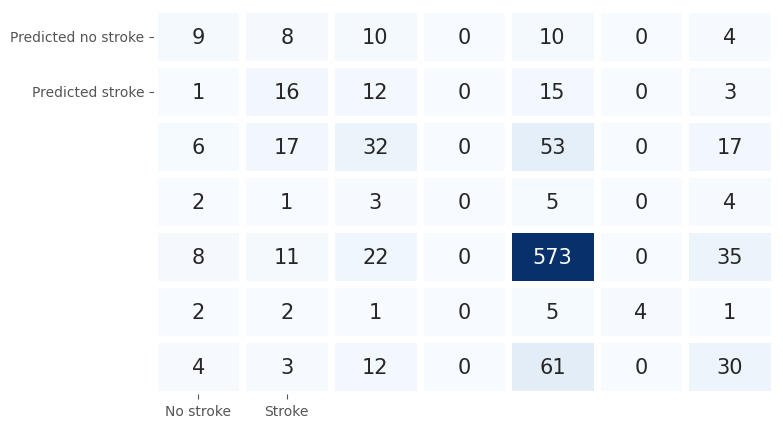

In [13]:
cm = confusion_matrix(y_test, y_pred)

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            xticklabels = ['No stroke', 'Stroke'], yticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# CNN with Attention

## Setup

In [14]:
data_rescale = df/255
data_rescale

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0.752941,0.600000,0.756863,0.764706,0.607843,0.752941,0.772549,0.603922,0.725490,0.792157,...,0.678431,0.486275,0.541176,0.717647,0.576471,0.650980,0.725490,0.603922,0.694118,0.007843
1,0.098039,0.054902,0.117647,0.266667,0.188235,0.294118,0.482353,0.364706,0.494118,0.619608,...,0.235294,0.152941,0.215686,0.098039,0.054902,0.109804,0.098039,0.054902,0.105882,0.007843
2,0.752941,0.541176,0.600000,0.784314,0.568627,0.639216,0.788235,0.556863,0.627451,0.807843,...,0.654902,0.505882,0.560784,0.623529,0.486275,0.556863,0.533333,0.407843,0.458824,0.007843
3,0.149020,0.074510,0.117647,0.372549,0.231373,0.282353,0.560784,0.403922,0.466667,0.670588,...,0.172549,0.101961,0.141176,0.098039,0.047059,0.066667,0.098039,0.047059,0.058824,0.007843
4,0.619608,0.443137,0.545098,0.760784,0.564706,0.682353,0.843137,0.635294,0.749020,0.882353,...,0.819608,0.650980,0.725490,0.674510,0.529412,0.584314,0.427451,0.305882,0.360784,0.007843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.717647,0.647059,0.709804,0.713725,0.647059,0.705882,0.721569,0.650980,0.713725,0.737255,...,0.815686,0.725490,0.733333,0.815686,0.729412,0.729412,0.807843,0.733333,0.741176,0.000000
10011,0.007843,0.011765,0.003922,0.149020,0.129412,0.125490,0.474510,0.407843,0.403922,0.517647,...,0.376471,0.309804,0.298039,0.094118,0.090196,0.082353,0.011765,0.015686,0.003922,0.000000
10012,0.517647,0.462745,0.462745,0.654902,0.584314,0.584314,0.686275,0.611765,0.627451,0.721569,...,0.800000,0.709804,0.698039,0.709804,0.623529,0.600000,0.674510,0.592157,0.568627,0.000000
10013,0.627451,0.486275,0.572549,0.643137,0.513725,0.596078,0.654902,0.498039,0.572549,0.662745,...,0.725490,0.635294,0.654902,0.721569,0.615686,0.650980,0.725490,0.635294,0.674510,0.000000


In [15]:
x = data_rescale.iloc[:,0:784]
y = data_rescale['label']*255

In [16]:
x_new = x.values.reshape(10015,28,28,1)
x_train , x_test , y_train ,y_test = train_test_split(x_new,y,test_size=0.2)
print(x_train.shape,
x_test.shape)
y_train1 = to_categorical(y_train, num_classes=7)
y_test1 = to_categorical(y_test, num_classes=7)

(8012, 28, 28, 1) (2003, 28, 28, 1)


## Model

In [17]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, Activation, Multiply, Add, Lambda, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()

model.add(Conv2D(8, kernel_size =3,padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(16, kernel_size =3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size =3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(7,activation='softmax'))

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
model = keras.Sequential([
        preprocessing.RandomFlip('horizontal'),
        layers.Conv2D(6 , kernel_size =3,padding='same'),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=2),
        layers.Conv2D(16, kernel_size = 3,padding='same'),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size =2),
        layers.Flatten(),
        layers.Dense(7,activation='softmax')
]
)

In [20]:
model.compile(optimizer ='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 8)        32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                        

## Fitting & Testing 

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

train = model.fit(x_train,
          y_train1,
          batch_size = 32 ,
          epochs= 1000,
          callbacks=[early_stop],
          validation_data=(x_test,y_test1) )
history_df = pd.DataFrame(train.history)


Epoch 1/1000
251/251 [==============================] - 1s 6ms/step - loss: 0.7034 - accuracy: 0.7426 - val_loss: 0.8518 - val_accuracy: 0.6925
Epoch 2/1000
251/251 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.7460 - val_loss: 0.8655 - val_accuracy: 0.6855
Epoch 3/1000
251/251 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.7435 - val_loss: 0.8971 - val_accuracy: 0.6845
Epoch 4/1000
251/251 [==============================] - 1s 5ms/step - loss: 0.6892 - accuracy: 0.7501 - val_loss: 0.8814 - val_accuracy: 0.6875
Epoch 5/1000
251/251 [==============================] - 1s 5ms/step - loss: 0.6745 - accuracy: 0.7516 - val_loss: 0.8810 - val_accuracy: 0.6790
Epoch 6/1000
251/251 [==============================] - 1s 5ms/step - loss: 0.6661 - accuracy: 0.7552 - val_loss: 0.9593 - val_accuracy: 0.6925
Epoch 7/1000
251/251 [==============================] - 1s 5ms/step - loss: 0.6498 - accuracy: 0.7607 - val_loss: 0.8935 - val_accuracy:

## Predicting

In [51]:
# Predict the test data
y_pred = model.predict(x_test)
y_predict = np.argmax(y_pred, axis=1)
y_tested = np.argmax(y_test1, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_tested, y_predict)
print(f"Accuracy: {accuracy}")

63/63 [==============================] - 0s 1ms/step
Accuracy: 0.7044433349975038


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_tested, y_predict))

              precision    recall  f1-score   support

           0       0.26      0.10      0.14        61
           1       0.36      0.20      0.26        90
           2       0.45      0.36      0.40       228
           3       0.50      0.03      0.06        30
           4       0.78      0.93      0.85      1328
           5       0.57      0.15      0.24        27
           6       0.42      0.28      0.34       239

    accuracy                           0.70      2003
   macro avg       0.48      0.29      0.33      2003
weighted avg       0.66      0.70      0.67      2003



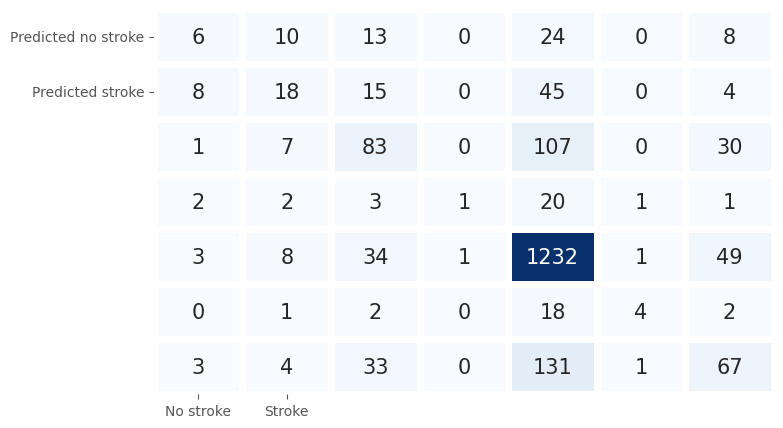

In [53]:
cm = confusion_matrix(y_tested, y_predict)

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            xticklabels = ['No stroke', 'Stroke'], yticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()